In [23]:
%matplotlib inline

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [25]:
# Load input data
X = np.loadtxt('data_clustering.txt', delimiter=',')

In [26]:
X

array([[ 2.08,  1.05],
       [ 2.05,  7.7 ],
       [ 4.53,  5.49],
       [ 6.23,  1.02],
       [ 5.35,  7.86],
       [ 2.88,  0.79],
       [ 2.32,  8.5 ],
       [ 5.06,  5.65],
       [ 5.38,  3.53],
       [ 6.31,  9.73],
       [ 3.41,  2.05],
       [ 1.75,  7.38],
       [ 3.88,  5.73],
       [ 7.22,  2.88],
       [ 5.85,  9.11],
       [ 3.66,  2.38],
       [ 0.45,  7.99],
       [ 6.01,  5.83],
       [ 7.06,  2.41],
       [ 7.47,  8.97],
       [ 2.2 ,  2.71],
       [ 2.94,  8.71],
       [ 5.87,  4.56],
       [ 4.57,  1.33],
       [ 5.84,  6.54],
       [ 3.4 ,  1.  ],
       [ 1.44,  8.26],
       [ 4.29,  4.69],
       [ 8.09,  1.99],
       [ 6.48,  9.44],
       [ 2.94,  1.78],
       [ 0.41,  9.14],
       [ 5.42,  4.08],
       [ 7.47,  2.15],
       [ 5.62,  7.65],
       [ 3.71,  1.26],
       [ 0.41,  8.9 ],
       [ 4.93,  5.73],
       [ 7.23,  0.14],
       [ 6.77,  9.09],
       [ 3.23,  2.64],
       [ 1.61,  7.85],
       [ 4.7 ,  4.78],
       [ 6.

In [27]:
type(X)

numpy.ndarray

In [28]:
X.shape

(350, 2)

In [29]:
X[:,0]

array([ 2.08,  2.05,  4.53,  6.23,  5.35,  2.88,  2.32,  5.06,  5.38,
        6.31,  3.41,  1.75,  3.88,  7.22,  5.85,  3.66,  0.45,  6.01,
        7.06,  7.47,  2.2 ,  2.94,  5.87,  4.57,  5.84,  3.4 ,  1.44,
        4.29,  8.09,  6.48,  2.94,  0.41,  5.42,  7.47,  5.62,  3.71,
        0.41,  4.93,  7.23,  6.77,  3.23,  1.61,  4.7 ,  6.86,  5.2 ,
        1.53,  0.27,  6.17,  8.47,  5.23,  3.27,  1.52,  5.49,  5.47,
        5.43,  2.51,  2.07,  5.21,  7.05,  6.09,  2.65,  3.18,  5.11,
        7.87,  6.51,  2.72,  1.79,  4.48,  5.7 ,  7.43,  3.25,  2.47,
        4.36,  6.75,  7.81,  1.98,  2.07,  5.18,  6.52,  5.49,  2.93,
        1.81,  6.22,  7.31,  7.41,  2.89,  3.03,  6.31,  7.63,  5.99,
        2.38,  1.98,  3.81,  6.67,  8.17,  2.37,  2.62,  5.6 ,  6.47,
        4.48,  2.91,  2.13,  4.01,  7.55,  6.65,  4.13,  0.67,  4.47,
        7.18,  6.  ,  3.89,  2.82,  4.97,  6.56,  5.52,  2.8 ,  1.49,
        3.59,  7.07,  5.43,  2.94,  2.3 ,  4.79,  7.37,  7.38,  1.78,
        2.33,  5.88,

In [30]:
X[:,1]

array([ 1.05,  7.7 ,  5.49,  1.02,  7.86,  0.79,  8.5 ,  5.65,  3.53,
        9.73,  2.05,  7.38,  5.73,  2.88,  9.11,  2.38,  7.99,  5.83,
        2.41,  8.97,  2.71,  8.71,  4.56,  1.33,  6.54,  1.  ,  8.26,
        4.69,  1.99,  9.44,  1.78,  9.14,  4.08,  2.15,  7.65,  1.26,
        8.9 ,  5.73,  0.14,  9.09,  2.64,  7.85,  4.78,  2.21,  9.65,
        2.93,  9.38,  5.74,  2.44,  7.41,  1.63,  8.8 ,  4.5 ,  2.81,
        7.45,  2.84,  7.67,  3.99,  3.  ,  9.39,  2.46,  8.62,  4.49,
        1.69,  8.04,  1.67,  7.94,  6.06,  2.29,  8.76,  2.99,  7.78,
        6.1 ,  0.96,  7.9 ,  1.96,  7.9 ,  7.47,  3.06,  9.55,  2.61,
        9.27,  4.35,  3.41,  9.02,  2.36,  8.08,  5.32,  1.3 ,  8.5 ,
        2.42,  8.09,  5.2 ,  2.11,  8.57,  0.62,  7.26,  4.33,  1.77,
        8.55,  2.16,  8.64,  4.24,  2.06,  8.99,  1.76,  7.53,  4.57,
        3.  ,  8.5 ,  3.09,  7.58,  4.67,  2.24,  8.23,  1.41,  7.08,
        6.74,  1.07,  8.66,  2.23,  8.8 ,  3.84,  1.64,  7.37,  2.  ,
        8.15,  5.78,

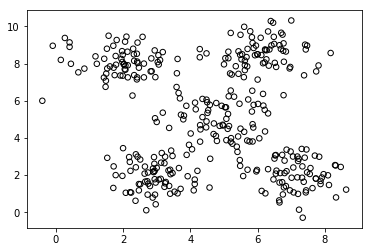

In [31]:
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

# s = 30 is size of your marks.
# plt.scatter(x,y)

In [32]:
x_min = X[:, 0].min() - 1
x_min

-1.4

In [33]:
x_max = X[:, 0].max() + 1
x_max

9.63

In [34]:
y_min= X[:, 1].min() - 1
y_min

-1.29

In [35]:
y_max = X[:, 1].max() + 1
y_max

11.32

([], <a list of 0 Text yticklabel objects>)

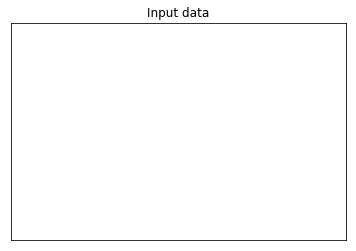

In [36]:
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [37]:
num_clusters = 5
# Create KMeans object 
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)


In [38]:
# Train the KMeans clustering model
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
# Step size of the mesh
step_size = 0.01

In [51]:
# Define the grid of points to plot the boundaries
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))
print(x_vals)
print(len(x_vals))
print(x_vals.shape)


[[-1.4  -1.39 -1.38 ...  9.6   9.61  9.62]
 [-1.4  -1.39 -1.38 ...  9.6   9.61  9.62]
 [-1.4  -1.39 -1.38 ...  9.6   9.61  9.62]
 ...
 [-1.4  -1.39 -1.38 ...  9.6   9.61  9.62]
 [-1.4  -1.39 -1.38 ...  9.6   9.61  9.62]
 [-1.4  -1.39 -1.38 ...  9.6   9.61  9.62]]
1261
(1261, 1103)


In [52]:
print(y_vals)
print(len(y_vals))
print(y_vals.shape)

[[-1.29 -1.29 -1.29 ... -1.29 -1.29 -1.29]
 [-1.28 -1.28 -1.28 ... -1.28 -1.28 -1.28]
 [-1.27 -1.27 -1.27 ... -1.27 -1.27 -1.27]
 ...
 [11.29 11.29 11.29 ... 11.29 11.29 11.29]
 [11.3  11.3  11.3  ... 11.3  11.3  11.3 ]
 [11.31 11.31 11.31 ... 11.31 11.31 11.31]]
1261
(1261, 1103)


In [44]:
# Predict output labels for all the points on the grid 
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
print(output)
print(len(output))

[4 4 4 ... 3 3 3]
1390883


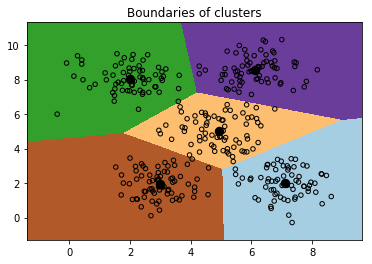

In [53]:
# Plot different regions and color them 
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()            
plt.imshow (output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), 
               y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired, 
           aspect='auto', 
           origin='lower')
# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=20)

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
        marker='o', s=30, linewidths=4, color='black', 
        zorder=12, facecolors='black')
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()